# Chapter 3. Sampling the Imaginary

In [1]:
import os

import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist

if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")
numpyro.set_platform("cpu")

/Applications/anaconda3/envs/rethinking_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

### Code 3.2

In [3]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prob_p = jnp.repeat(1, 1000)
prob_data = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = prob_data * prob_p
posterior = posterior / jnp.sum(posterior)

### Code 3.3

In [4]:
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

### Code 3.4

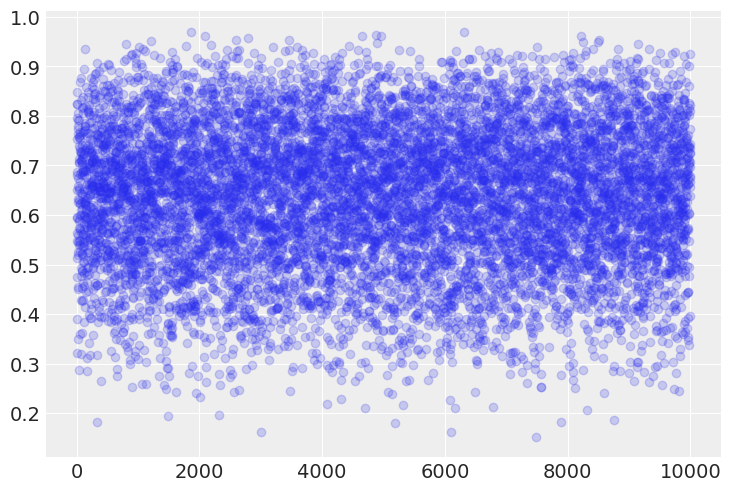

In [5]:
plt.scatter(range(len(samples)), samples, alpha=0.2)
plt.show()

### Code 3.5

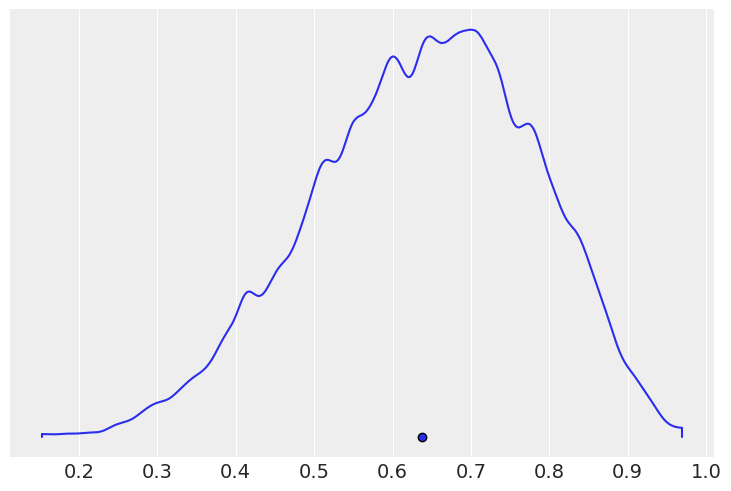

In [6]:
az.plot_density({"": samples}, hdi_prob=1)
plt.show()

### Code 3.6

In [7]:
# add up posterior probability where p < 0.5
jnp.sum(posterior[p_grid < 0.5])

DeviceArray(0.17187458, dtype=float32)

### Code 3.7

In [8]:
jnp.sum(samples < 0.5) / 1e4

DeviceArray(0.1711, dtype=float32, weak_type=True)

### Code 3.8

In [9]:
jnp.sum((samples > 0.5) & (samples < 0.75)) / 1e4

DeviceArray(0.6025, dtype=float32, weak_type=True)

### Code 3.9

In [10]:
jnp.quantile(samples, 0.8)

DeviceArray(0.7637637, dtype=float32)

### Code 3.10

In [11]:
jnp.quantile(samples, jnp.array([0.1, 0.9]))

DeviceArray([0.44644645, 0.8168168 ], dtype=float32)

### Code 3.11

In [12]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=3, probs=p_grid).log_prob(3))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

### Code 3.12

In [13]:
jnp.percentile(samples, q=jnp.array([25, 75]))

DeviceArray([0.7077077, 0.9319319], dtype=float32)

### Code 3.13

In [14]:
numpyro.diagnostics.hpdi(samples, prob=0.5)

array([0.8418418, 0.998999 ], dtype=float32)

### Code 3.14

In [15]:
p_grid[jnp.argmax(posterior)]

DeviceArray(1., dtype=float32)

### Code 3.15

In [16]:
samples[jnp.argmax(gaussian_kde(samples, bw_method=0.01)(samples))]

DeviceArray(0.988989, dtype=float32)

### Code 3.16

In [17]:
print(jnp.mean(samples))
print(jnp.median(samples))

0.8011085
0.8428428


### Code 3.17

In [18]:
jnp.sum(posterior * jnp.abs(0.5 - p_grid))

DeviceArray(0.31287518, dtype=float32)

### Code 3.18

In [19]:
loss = vmap(lambda d: jnp.sum(posterior * jnp.abs(d - p_grid)))(p_grid)

### Code 3.19

In [20]:
p_grid[jnp.argmin(loss)]

DeviceArray(0.8408408, dtype=float32)

### Code 3.20

In [21]:
jnp.exp(dist.Binomial(total_count=2, probs=0.7).log_prob(jnp.arange(3)))

DeviceArray([0.08999996, 0.42000008, 0.48999974], dtype=float32)

### Code 3.21

In [22]:
dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(0))

DeviceArray(1, dtype=int32, weak_type=True)

### Code 3.22

In [23]:
dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(2), (10,))

DeviceArray([2, 1, 2, 1, 1, 2, 2, 2, 2, 1], dtype=int32, weak_type=True)

### Code 3.23

In [24]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(0), (100000,))
jnp.unique(dummy_w, return_counts=True)[1] / 1e5

DeviceArray([0.0888 , 0.41789, 0.49331], dtype=float32, weak_type=True)

### Code 3.24

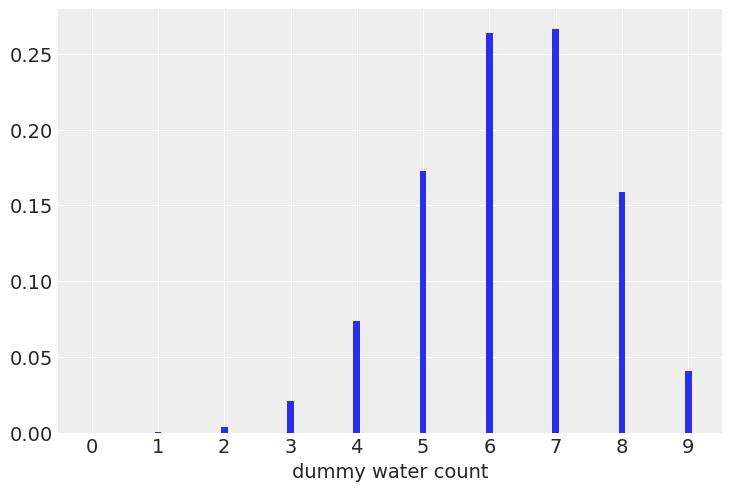

In [25]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(random.PRNGKey(0), (100000,))
ax = az.plot_dist(dummy_w.copy(), kind="hist", hist_kwargs={"rwidth": 0.1})
ax.set_xlabel("dummy water count", fontsize=14)
plt.show()

### Code 3.25

In [26]:
w = dist.Binomial(total_count=9, probs=0.6).sample(random.PRNGKey(0), (int(1e4),))

### Code 3.26

In [27]:
w = dist.Binomial(total_count=9, probs=samples).sample(random.PRNGKey(0))

### Code 3.27

In [28]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples = p_grid[dist.Categorical(posterior).sample(random.PRNGKey(100), (10000,))]

### Code 3.28

In [29]:
# fmt: off
birth1 = [
    1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
    0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
]
birth2 = [
    0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
    0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
]

### Code 3.29

In [30]:
homeworkch3 = pd.read_csv("../data/homeworkch3.csv")

### Code 3.30

In [31]:
sum(birth1) + sum(birth2)

111